<img src="http://bigdataexperience.org/BX/wp-content/uploads/2016/05/BX-FULL.png" width="200" height="200" alt="Big Data Experience Center, King Mongkut's University of Technology Thonburi">

# <center>CPE352 Data Science</center>
# <center>Lecture 7 - Machine Learning - Classification</center>
---

# 1. Load data

In [1]:
import pandas as pd
pd.set_option('max_columns',500)
telcoData = pd.read_csv('M1_telco.csv', na_values=' ')
telcoData.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

# 2. Clean data

In [2]:
telcoData.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [3]:
telcoData.fillna(0, inplace=True)

In [4]:
telcoData.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

# 3. Select relevant columns

In [5]:
telcoData.set_index('customerID', inplace=True)
telcoData.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
7590-VHVEG  Female              0     Yes         No       1           No   
5575-GNVDE    Male              0      No         No      34          Yes   
3668-QPYBK    Male              0      No         No       2          Yes   
7795-CFOCW    Male              0      No         No      45           No   
9237-HQITU  Female              0      No         No       2          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   
5575-GNVDE                No             DSL            Yes           No   
3668-QPYBK                No             DSL            Yes          Yes   
7795-CFOCW  No phone service             DSL            Yes           No   
9237-HQITU                No     Fiber optic             No           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   
5575-GNVDE              Yes          No          No              No   
3668-QPYBK               No          No          No              No   
7795-CFOCW              Yes         Yes          No              No   
9237-HQITU               No          No          No              No   

                  Contract PaperlessBilling              PaymentMethod  \
customerID                                                               
7590-VHVEG  Month-to-month              Yes           Electronic check   
5575-GNVDE        One year               No               Mailed check   
3668-QPYBK  Month-to-month              Yes               Mailed check   
7795-CFOCW        One year               No  Bank transfer (automatic)   
9237-HQITU  Month-to-month              Yes           Electronic check   

            MonthlyCharges  TotalCharges Churn  
customerID                                      
7590-VHVEG           29.85         29.85    No  
5575-GNVDE           56.95       1889.50    No  
3668-QPYBK           53.85        108.15   Yes  
7795-CFOCW           42.30       1840.75    No  
9237-HQITU           70.70        151.65   Yes

# Activity: Data preparation
1. Transform categorical variable into multiple binary columns (get_dummies, drop_first)
2. Concatenate with numerical data

In [37]:
df_cat=pd.get_dummies(telcoData.select_dtypes('object'),drop_first=True)
df_cat

gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
customerID                                                               
7590-VHVEG            0            1               0                 0   
5575-GNVDE            1            0               0                 1   
3668-QPYBK            1            0               0                 1   
7795-CFOCW            1            0               0                 0   
9237-HQITU            0            0               0                 1   
...                 ...          ...             ...               ...   
6840-RESVB            1            1               1                 1   
2234-XADUH            0            1               1                 1   
4801-JZAZL            0            1               1                 0   
8361-LTMKD            1            1               0                 1   
3186-AJIEK            1            0               0                 1   

            MultipleLines_No phone service  MultipleLines_Yes  \
customerID                                                      
7590-VHVEG                               1                  0   
5575-GNVDE                               0                  0   
3668-QPYBK                               0                  0   
7795-CFOCW                               1                  0   
9237-HQITU                               0                  0   
...                                    ...                ...   
6840-RESVB                               0                  1   
2234-XADUH                               0                  1   
4801-JZAZL                               1                  0   
8361-LTMKD                               0                  1   
3186-AJIEK                               0                  0   

            InternetService_Fiber optic  InternetService_No  \
customerID                                                    
7590-VHVEG                            0                   0   
5575-GNVDE                            0                   0   
3668-QPYBK                            0                   0   
7795-CFOCW                            0                   0   
9237-HQITU                            1                   0   
...                                 ...                 ...   
6840-RESVB                            0                   0   
2234-XADUH                            1                   0   
4801-JZAZL                            0                   0   
8361-LTMKD                            1                   0   
3186-AJIEK                            1                   0   

            OnlineSecurity_No internet service  OnlineSecurity_Yes  \
customerID                                                           
7590-VHVEG                                   0                   0   
5575-GNVDE                                   0                   1   
3668-QPYBK                                   0                   1   
7795-CFOCW                                   0                   1   
9237-HQITU                                   0                   0   
...                                        ...                 ...   
6840-RESVB                                   0                   1   
2234-XADUH                                   0                   0   
4801-JZAZL                                   0                   1   
8361-LTMKD                                   0                   0   
3186-AJIEK                                   0                   1   

            OnlineBackup_No internet service  OnlineBackup_Yes  \
customerID                                                       
7590-VHVEG                                 0                 1   
5575-GNVDE                                 0                 0   
3668-QPYBK                                 0                 1   
7795-CFOCW                                 0                 0   
9237-HQITU                                 0                 0   
...       

In [9]:
df_num = telcoData.select_dtypes('number')

In [10]:
df_final = pd.concat([df_num,df_cat],axis=1)

# Activity: Sample your data
1. Sample your data into 2 sets: 70%, 30%
2. Check distribution of churn variables. See if they are still similar to the original distribution

In [11]:
telcoData_train = df_final.sample(frac=0.7)

In [12]:
telcoData_train.index

Index(['9225-BZLNZ', '9498-FIMXL', '9795-SHUHB', '4581-SSPWD', '2831-EBWRN',
       '8679-LZBMD', '6537-QLGEX', '5857-XRECV', '7898-PDWQE', '7326-RIGQZ',
       ...
       '5149-CUZUJ', '6574-MCOEH', '2176-OSJUV', '0365-BZUWY', '9888-ZCUMM',
       '1397-XKKWR', '8280-MQRQN', '2560-PPCHE', '1627-AFWVJ', '4822-RVYBB'],
      dtype='object', name='customerID', length=4930)

In [13]:
telcoData_test = df_final.drop(index=telcoData_train.index)

# 4. Train a decision tree model

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
tree = DecisionTreeClassifier(min_samples_leaf=10)
tree.fit(telcoData_train.drop(columns='Churn_Yes'), 
         telcoData_train['Churn_Yes'])

DecisionTreeClassifier(min_samples_leaf=10)

# 5. Plot a decision tree

In [16]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                rotate=True,
                feature_names=telcoData_train.columns[:-1])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('tree.png')
Image(graph.create_png())

# 6. Variable importance

In [17]:
pd.DataFrame(dict(Feature=telcoData_train.columns[:-1],
                  Value=tree.feature_importances_))\
  .sort_values(by='Value', ascending=False)

Feature     Value
1                                  tenure  0.299138
10            InternetService_Fiber optic  0.225270
3                            TotalCharges  0.130084
2                          MonthlyCharges  0.119134
28         PaymentMethod_Electronic check  0.035998
26                   PaperlessBilling_Yes  0.028930
4                             gender_Male  0.019341
19                        TechSupport_Yes  0.017032
9                       MultipleLines_Yes  0.015064
11                     InternetService_No  0.014204
25                      Contract_Two year  0.013687
13                     OnlineSecurity_Yes  0.011659
24                      Contract_One year  0.011546
7                        PhoneService_Yes  0.010358
6                          Dependents_Yes  0.008470
5                             Partner_Yes  0.006709
27  PaymentMethod_Credit card (automatic)  0.006177
15                       OnlineBackup_Yes  0.005638
29             PaymentMethod_Mailed check  0.005455
0                           SeniorCitizen  0.005347
21                        StreamingTV_Yes  0.005082
17                   DeviceProtection_Yes  0.002531
20        StreamingTV_No internet service  0.002487
8          MultipleLines_No phone service  0.000659
18        TechSupport_No internet service  0.000000
22    StreamingMovies_No internet service  0.000000
23                    StreamingMovies_Yes  0.000000
16   DeviceProtection_No internet service  0.000000
14       OnlineBackup_No internet service  0.000000
12     OnlineSecurity_No internet service  0.000000

# 7. Prediction

In [18]:
tree.predict(telcoData_test.drop(columns='Churn_Yes'))

array([1, 1, 0, ..., 0, 0, 1], dtype=uint8)

In [19]:
tree.predict_proba(telcoData_test.drop(columns='Churn_Yes'))

array([[0.4       , 0.6       ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       ...,
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.05263158, 0.94736842]])

# 8. Classification report

In [20]:
from sklearn.metrics import classification_report

In [21]:
res = tree.predict(telcoData_test.drop(columns='Churn_Yes'))
print(classification_report(y_true=telcoData_test['Churn_Yes'].values, y_pred=res))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1543
           1       0.61      0.48      0.54       570

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.76      0.78      0.77      2113



# 9. LDA

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [23]:
lda = LinearDiscriminantAnalysis()
lda.fit(telcoData_train.drop(columns='Churn_Yes'), telcoData_train['Churn_Yes'])

LinearDiscriminantAnalysis()

In [24]:
pd.DataFrame(dict(Feature = telcoData_train.columns[:-1],
                  Coefficient = lda.coef_[0]))

Feature  Coefficient
0                           SeniorCitizen     0.262841
1                                  tenure    -0.015650
2                          MonthlyCharges    -0.012836
3                            TotalCharges    -0.000280
4                             gender_Male    -0.016971
5                             Partner_Yes    -0.011792
6                          Dependents_Yes    -0.227681
7                        PhoneService_Yes    -0.019816
8          MultipleLines_No phone service     0.019816
9                       MultipleLines_Yes     0.442314
10            InternetService_Fiber optic     1.658183
11                     InternetService_No    -0.169350
12     OnlineSecurity_No internet service    -0.169350
13                     OnlineSecurity_Yes    -0.256153
14       OnlineBackup_No internet service    -0.169350
15                       OnlineBackup_Yes     0.013377
16   DeviceProtection_No internet service    -0.169350
17                   DeviceProtection_Yes    -0.068026
18        TechSupport_No internet service    -0.169350
19                        TechSupport_Yes    -0.236980
20        StreamingTV_No internet service    -0.169350
21                        StreamingTV_Yes     0.505907
22    StreamingMovies_No internet service    -0.169350
23                    StreamingMovies_Yes     0.416742
24                      Contract_One year    -0.757787
25                      Contract_Two year    -0.478950
26                   PaperlessBilling_Yes     0.393748
27  PaymentMethod_Credit card (automatic)    -0.099388
28         PaymentMethod_Electronic check     0.581645
29             PaymentMethod_Mailed check    -0.062669

# 10. Predicting with LDA

In [25]:
res_lda = lda.predict(telcoData_test.drop(columns='Churn_Yes'))
print(classification_report(y_true=telcoData_test['Churn_Yes'].values, y_pred=res_lda))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1543
           1       0.63      0.55      0.59       570

    accuracy                           0.79      2113
   macro avg       0.74      0.72      0.72      2113
weighted avg       0.78      0.79      0.79      2113



# 11. Logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression()
lr.fit(telcoData_train.drop(columns='Churn_Yes'), telcoData_train['Churn_Yes'])

LogisticRegression()

# 12. Coefficient

In [28]:
pd.DataFrame(dict(Feature = telcoData_train.columns[:-1],
                  Coefficient = lr.coef_[0]))

Feature  Coefficient
0                           SeniorCitizen     0.217655
1                                  tenure    -0.071894
2                          MonthlyCharges     0.003900
3                            TotalCharges     0.000425
4                             gender_Male    -0.013609
5                             Partner_Yes     0.026844
6                          Dependents_Yes    -0.250454
7                        PhoneService_Yes    -0.480615
8          MultipleLines_No phone service     0.305526
9                       MultipleLines_Yes     0.239324
10            InternetService_Fiber optic     0.612913
11                     InternetService_No    -0.098812
12     OnlineSecurity_No internet service    -0.098812
13                     OnlineSecurity_Yes    -0.535322
14       OnlineBackup_No internet service    -0.098812
15                       OnlineBackup_Yes    -0.143145
16   DeviceProtection_No internet service    -0.098812
17                   DeviceProtection_Yes    -0.225450
18        TechSupport_No internet service    -0.098812
19                        TechSupport_Yes    -0.480654
20        StreamingTV_No internet service    -0.098812
21                        StreamingTV_Yes     0.197119
22    StreamingMovies_No internet service    -0.098812
23                    StreamingMovies_Yes     0.072820
24                      Contract_One year    -0.423685
25                      Contract_Two year    -0.678678
26                   PaperlessBilling_Yes     0.531916
27  PaymentMethod_Credit card (automatic)    -0.194266
28         PaymentMethod_Electronic check     0.287930
29             PaymentMethod_Mailed check    -0.087413

# 13. Prediction and evaluation

In [29]:
res_lr = lr.predict(telcoData_test.drop(columns='Churn_Yes'))
print(classification_report(y_true=telcoData_test['Churn_Yes'].values, y_pred=res_lr))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1543
           1       0.66      0.55      0.60       570

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113



# Lab - Heart Disease

## Task
Build ML model to classify patients with heart disease.
## Data
Data is in the file "heart.csv"
### Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "target" field refers to the presence of heart disease in the patient, 0 for not present and 1 for present.

### Content

Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 0 for normal, 1 for heart disease

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

Reference: https://www.kaggle.com/ronitf/heart-disease-uci

In [48]:
HeartData = pd.read_csv('heart.csv', na_values=' ')
HeartData.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [31]:
HeartData.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [38]:
HeartData.select_dtypes('object').columns

Index([], dtype='object')

In [53]:
# Train 70 Test 30
HeartDataTrain = HeartData.sample(frac=0.7)
HeartDataTrain.shape

(212, 14)

In [54]:
HeartDataTest=HeartData.drop(index=HeartDataTrain.index)
HeartDataTest.shape

(91, 14)

# DecisionTree

In [55]:
tree = DecisionTreeClassifier(min_samples_leaf=10)
tree.fit(HeartDataTrain.drop(columns='target'), 
         HeartDataTrain['target'])

DecisionTreeClassifier(min_samples_leaf=10)

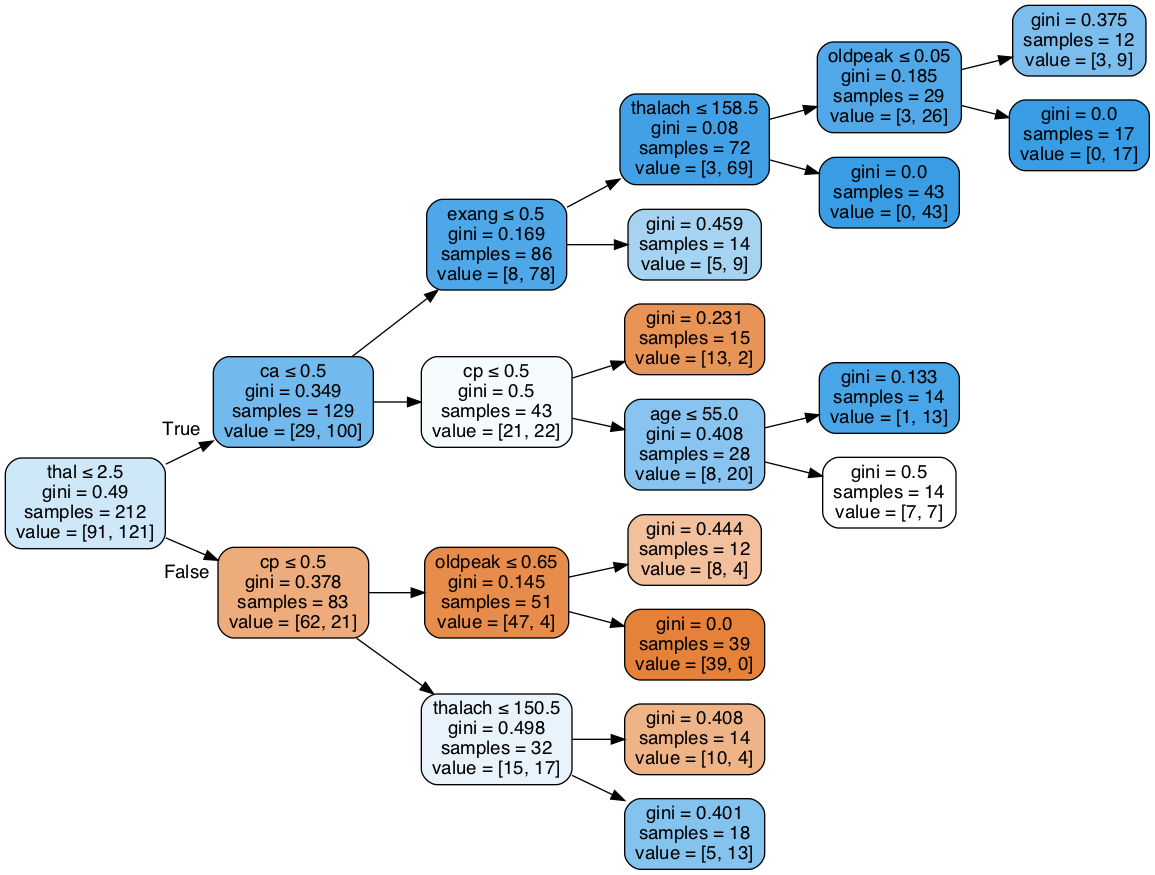

In [56]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                rotate=True,
                feature_names=HeartDataTrain.columns[:-1])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('tree.png')
Image(graph.create_png())

### Variable importance

In [58]:
pd.DataFrame(dict(Feature=HeartDataTrain.columns[:-1],
                  Value=tree.feature_importances_))\
  .sort_values(by='Value', ascending=False)

Feature     Value
12      thal  0.441706
2         cp  0.235050
11        ca  0.143713
7    thalach  0.054072
9    oldpeak  0.046805
0        age  0.041238
8      exang  0.037416
1        sex  0.000000
3   trestbps  0.000000
4       chol  0.000000
5        fbs  0.000000
6    restecg  0.000000
10     slope  0.000000

### Prediction with data test 30%

In [64]:
tree.predict(HeartDataTest.drop(columns='target'))

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0])

In [66]:
tree.predict_proba(HeartDataTest.drop(columns='target'))

array([[0.        , 1.        ],
       [0.27777778, 0.72222222],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.35714286, 0.64285714],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.35714286, 0.64285714],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.35714286, 0.64285714],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.25      , 0.75      ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.27777778, 0.72222222],
       [0.71428571, 0.28571429],
       [0.        , 1.        ],
       [0.

### Classification report

In [68]:
res = tree.predict(HeartDataTest.drop(columns='target'))
print(classification_report(y_true=HeartDataTest['target'].values, y_pred=res))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        47
           1       0.80      0.82      0.81        44

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



# LDA

In [69]:
lda = LinearDiscriminantAnalysis()
lda.fit(HeartDataTrain.drop(columns='target'), HeartDataTrain['target'])

LinearDiscriminantAnalysis()

In [72]:
pd.DataFrame(dict(Feature = HeartDataTrain.columns[:-1],
                  Coefficient = lda.coef_[0]))

Feature  Coefficient
0        age    -0.001821
1        sex    -1.682198
2         cp     0.892057
3   trestbps    -0.020757
4       chol    -0.001594
5        fbs     0.021887
6    restecg     0.456544
7    thalach     0.035309
8      exang    -1.376033
9    oldpeak    -0.181818
10     slope     0.512666
11        ca    -0.955370
12      thal    -1.381785

### Predicting with LDA

In [73]:
res_lda = lda.predict(HeartDataTest.drop(columns='target'))
print(classification_report(y_true=HeartDataTest['target'].values, y_pred=res_lda))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82        47
           1       0.77      0.93      0.85        44

    accuracy                           0.84        91
   macro avg       0.85      0.84      0.83        91
weighted avg       0.85      0.84      0.83        91



# Logistic regression

In [82]:
lr = LogisticRegression()
lr.fit(HeartDataTrain.drop(columns='target'), HeartDataTrain['target'])
pd.DataFrame(dict(Feature = HeartDataTrain.columns[:-1],
                  Coefficient = lr.coef_[0]))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature  Coefficient
0        age     0.010907
1        sex    -1.369678
2         cp     0.780222
3   trestbps    -0.018366
4       chol    -0.003073
5        fbs    -0.169578
6    restecg     0.430489
7    thalach     0.038844
8      exang    -0.771365
9    oldpeak    -0.243219
10     slope     0.366023
11        ca    -0.771985
12      thal    -1.065759

In [77]:
res_lr = lr.predict(HeartDataTest.drop(columns='target'))
print(classification_report(y_true=HeartDataTest['target'].values, y_pred=res_lr))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82        47
           1       0.77      0.93      0.85        44

    accuracy                           0.84        91
   macro avg       0.85      0.84      0.83        91
weighted avg       0.85      0.84      0.83        91

